In [1]:
import tensorflow as tf
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import json

In [2]:
route_dataset_model = "dataset_for_modelo.xlsx"
dataset = pd.read_excel(route_dataset_model)

lista_ingredientes_principales=['Yuca', 'Huevo', 'Pollo', 'Carne', 'Choclo', 'Lomo', 'Pescado', 'Cuy', 'Papa', 'Pasta', 'Camote', 'Papas Fritas', 'Camarones', 'Cerdo', 'Arroz', 'Langostinos', 'Mondongo', 'Frijoles', 'Carne Molida']

#Delete unnecessary column
dataset = dataset.drop('F.D. List Result(Important Ingredient/Portion)', axis=1) 

#Convert to array
dataset['F.D. List(Important Ingredient/Portion)'] = dataset['F.D. List(Important Ingredient/Portion)'].apply(ast.literal_eval)

In [3]:
array=[]
for i in range(0,dataset.shape[0]):
    arr=[]
    for j in range(0,len(lista_ingredientes_principales)):
        check=False
        for k in dataset['F.D. List(Important Ingredient/Portion)'][i]:
            if(lista_ingredientes_principales[j]==k[0]):
                arr.append(int(k[1]))
                check=True
                break
        if(check==False):
            arr.append(0)
    array.append(arr)
dataset['F.D. List(Portion)']=array

expanded_columns = pd.DataFrame(dataset["F.D. List(Portion)"].tolist(), columns=[f"Ingredient_{i+1}" for i in range(19)])
dataset = pd.concat([dataset, expanded_columns], axis=1)
dataset.drop("F.D. List(Portion)", axis=1, inplace=True)

In [4]:
#Everything is in grams except the N° Food dish
columns_to_scale_X = [
    "P. Carbohydrates required",
    "P. Protein required",
    "P. Total fat required",
    "N° Food dish",
    "F.D. Portion (g)",
    "F.D. Carbohydrates (g)",
    "F.D. Protein (g)",
    "F.D. Total fat (g)",
    "Ingredient_1","Ingredient_2","Ingredient_3","Ingredient_4","Ingredient_5","Ingredient_6","Ingredient_7",
    "Ingredient_8","Ingredient_9","Ingredient_10","Ingredient_11","Ingredient_12","Ingredient_13",
    "Ingredient_14","Ingredient_15","Ingredient_16","Ingredient_17","Ingredient_18","Ingredient_19"
]

column_to_scale_Y = "Total imp. ingredients result (g)"

#X scaling
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(dataset[columns_to_scale_X])
X_scaled = pd.DataFrame(X_scaled, columns=columns_to_scale_X)
X_scaled = X_scaled.round(2)

#Y scaling
scaler_Y = MinMaxScaler()
Y_scaled = scaler_Y.fit_transform(dataset[[column_to_scale_Y]])
Y_scaled = pd.DataFrame(Y_scaled, columns=[column_to_scale_Y])

X_train = X_scaled.iloc[:250]
X_test = X_scaled.iloc[250:]
y_train = Y_scaled.iloc[:250]
y_test = Y_scaled.iloc[250:]

MSE=[]
RMSE=[]
MAE=[]
R_2=[]

Train and test with MLP

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(27,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', 
              metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=1000, batch_size=16)

Epoch 1/1000


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2543 - mean_squared_error: 0.2543
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0543 - mean_squared_error: 0.0543 
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0265 - mean_squared_error: 0.0265 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0115 - mean_squared_error: 0.0115 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - mean_squared_error: 0.0074 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - mean_squared_error: 0.0059 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051 - mean_squared_error: 0.0051 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - mean_squared_error: 0.0037 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - mean_squared_error: 0.0038 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - mean_squared_error: 0.0027 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s

Scatter Plot: Real vs Predicted for Total Portion of Important Ingredients (g)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


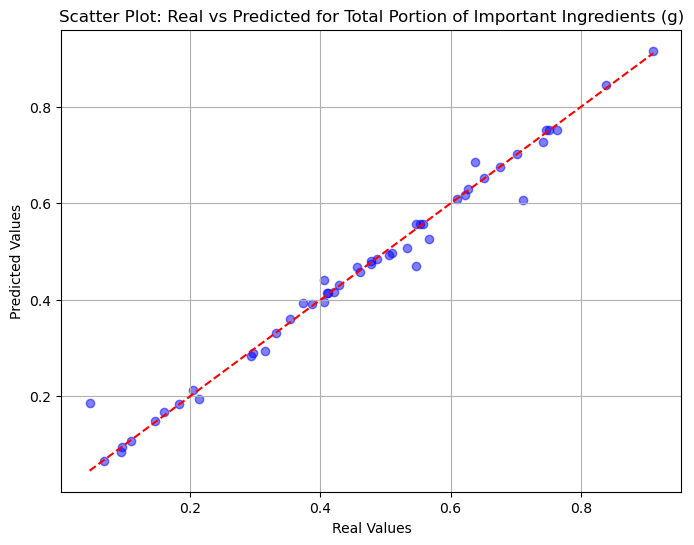

In [8]:
y_test_pred = model.predict(X_test)

y_test_real = y_test['Total imp. ingredients result (g)']
y_test_pred_result_1 = y_test_pred[:, 0]

plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_test_pred_result_1, color='blue', alpha=0.5)

x = np.linspace(min(y_test_real), max(y_test_real), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.title('Scatter Plot: Real vs Predicted for Total Portion of Important Ingredients (g)')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [8]:
y_pred_test = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


**Regresion Lineal**

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
#
y_pred_test = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

**Regresion Ridge**

In [10]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
#
y_pred_test = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

**Máquina de Soporte Vectorial (SVR)**

In [11]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
#
y_pred_test = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Random Forest Regressor**

In [12]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=10)
rf_reg.fit(X_train, y_train)
#
y_pred_test = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


**Gradient Boosting Regressor**

In [13]:
gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=20, min_samples_leaf=10)
gb_reg.fit(X_train, y_train)
#
y_pred_test = gb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
#
MSE.append(mse)
RMSE.append(rmse)
MAE.append(mae)
R_2.append(r2)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Comparison of models for the Second part

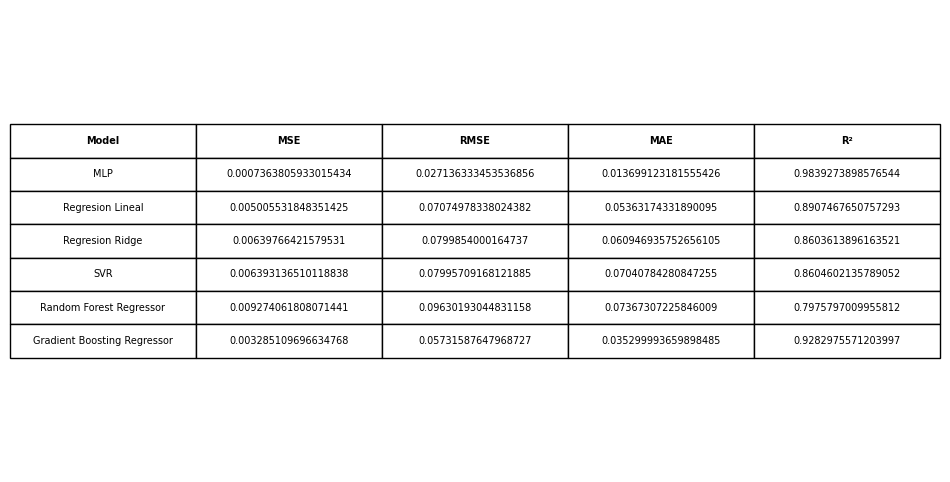

In [14]:
data = {
    'Model': ['MLP', 'Regresion Lineal', 'Regresion Ridge', 'SVR', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
    'MSE': [MSE[0], MSE[1], MSE[2], MSE[3],MSE[4], MSE[5]],
    'RMSE': [RMSE[0], RMSE[1], RMSE[2], RMSE[3],RMSE[4], RMSE[5]],
    'MAE': [MAE[0], MAE[1], MAE[2], MAE[3],MAE[4], MAE[5]],
    'R²': [R_2[0], R_2[1], R_2[2], R_2[3],R_2[4], R_2[5]],
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 6))

ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

table.scale(1, 2)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold')

plt.show()

Export the model and its scalers

In [15]:
scaler_X_params = {
    'data_min_': scaler_X.data_min_.tolist(),
    'data_max_': scaler_X.data_max_.tolist()
}
scaler_Y_params = {
    'data_min_': scaler_Y.data_min_.tolist(),
    'data_max_': scaler_Y.data_max_.tolist()
}

with open('modelos/model2/scaler_X_params.json', 'w') as f:
    json.dump(scaler_X_params, f)

with open('modelos/model2/scaler_Y_params.json', 'w') as f:
    json.dump(scaler_Y_params, f)

In [16]:
model.save('modelos/model2/saved_model2.h5')